<a href="https://colab.research.google.com/github/DikshantPatel2210/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



# ML Models

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

DL models

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Input, Embedding

In [44]:
df = pd.read_csv("/content/flight_dataset.csv")
df.sample(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8829,Vistara,Mumbai,Hyderabad,1,12395,6,3,2019,20,55,22,55,26,0
2879,Jet Airways,Banglore,Delhi,0,7229,3,5,2019,11,10,14,5,2,55
10113,Jet Airways,Banglore,New Delhi,1,26890,1,3,2019,7,0,13,15,6,15
1627,Air India,Kolkata,Banglore,1,7452,1,5,2019,16,45,21,5,28,20
8495,IndiGo,Banglore,Delhi,0,4823,27,4,2019,18,25,21,20,2,55


In [46]:
df["Airline"]

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
Date,10683.0,13.508378,8.479277,1.0,6.0,12.0,21.0,27.0
Month,10683.0,4.708602,1.164357,3.0,3.0,5.0,6.0,6.0
Year,10683.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
Dep_hours,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
Arrival_hours,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
Arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0
Duration_hours,10683.0,10.246560,8.494988,1.0,2.0,8.0,15.0,47.0


## Column Analysis(numerical)

In [49]:
Columns_objects = df.select_dtypes(include = "object").columns.tolist()
Columns_number = df.select_dtypes(include = ["int64", "float64"]).columns.tolist()
Time_series = ["Year", "Month", "Date"]

In [50]:
for col in Columns_objects:
  print(f"Columns '{col}' unique values : \t {df[col].unique()}")

for col in Columns_number :
  print(f"Columns '{col}' unique values : \t{df[col].unique()}")

Columns 'Airline' unique values : 	 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Columns 'Source' unique values : 	 ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Columns 'Destination' unique values : 	 ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Columns 'Total_Stops' unique values : 	[0 2 1 3 4]
Columns 'Price' unique values : 	[ 3897  7662 13882 ...  9790 12352 12648]
Columns 'Date' unique values : 	[24  1  9 12 27 18  3 15  6 21]
Columns 'Month' unique values : 	[3 5 6 4]
Columns 'Year' unique values : 	[2019]
Columns 'Dep_hours' unique values : 	[22  5  9 18 16  8 11 20 21 17 14  4  7 10 15  6 19 23 13  2 12  0  1  3]
Columns 'Dep_min' unique values : 	[20 50 25  5  0 55 45 40 10 15 35 30]
Columns 'Arrival_hours' unique values : 	[ 1 13  4 23 21 11 10  5 19 22  9 12  6  8  3 20 16 18 15 14  0  2  7 17]
Columns 'Ar

In [51]:
from os import times_result
Columns_number = [element for element in Columns_number if element not in Time_series]

for col in Columns_number :
  fig = go.Figure()
  fig.add_trace(go.Box(y = df[col], name = col))


  fig.update_layout(
      title = f"Box Plot for {col}",
      yaxis_title = "Values",
      title_font_size = 25,
      plot_bgcolor = "black",
      paper_bgcolor = "black",
      font = dict(color = "white")
  )

  fig.update_xaxes(showgrid = True , gridwidth = 1, gridcolor = "white", griddash = "dash")
  fig.update_yaxes(showgrid = True , gridwidth = 1, gridcolor = "white", griddash = "dash")

  fig.show()



##Column Analysis(Time Series)

In [80]:
df["Airline"].value_counts(normalize= True)

Airline
Jet Airways                          0.360292
IndiGo                               0.192174
Air India                            0.163999
Multiple carriers                    0.111954
SpiceJet                             0.076570
Vistara                              0.044838
Air Asia                             0.029861
GoAir                                0.018160
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: proportion, dtype: float64

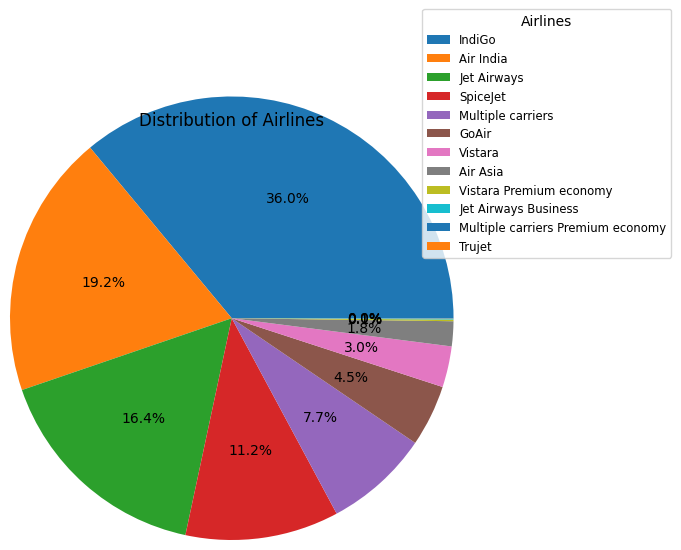

In [87]:
airline_counts = df['Airline'].value_counts()

# Step 2: Create the pie chart
plt.pie(airline_counts, labels= None, autopct='%1.1f%%',startangle = 0 , radius = 1.5 ,)
plt.title('Distribution of Airlines', loc= "center")
plt.legend(df["Airline"].unique(), title="Airlines", loc="center left",  bbox_to_anchor=(1, 0.5, 0.5, 1) , fontsize='small')
plt.show()

In [ ]:
Time_series.remove("Year")

In [ ]:

df_monthly = df.groupby("Month")["Price"].sum().reset_index()
df_monthly
df_date = df.groupby("Date")["Price"].sum().reset_index()
df_date

for time in Time_series:
  if time == "Month" :
    data = df_monthly
    x_label = "Month"
  elif time == "Date" :
    data = df_date
    x_label = "Date"

  fig = go.Figure()
  fig.add_trace(go.Scatter(
      x = data[x_label],
      y = data["Price"],
      mode = "lines",
      name = f"Price vs {time}",
      line = dict(color = "red")
  ))

  fig.update_layout(
        title = f"Time Seires Plot for Price VS {time}",
        xaxis_title = x_label,
        yaxis_title = "Total_Price",
        title_font_size = 25,
        plot_bgcolor = "black",
        paper_bgcolor = "black",
        font = dict(color = "white")
  )

  fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = "white", griddash = "dash")
  fig.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = "white", griddash = "dash")
  fig.show()


In [ ]:
df['Full_date'] = df['Date'].astype(str).str.cat(df[['Month', "Year"]].astype(str), sep='-')
df["Full_date"] = pd.to_datetime(df["Full_date"], dayfirst=True)

In [ ]:
df['Day'] = df['Full_date'].dt.day_name()

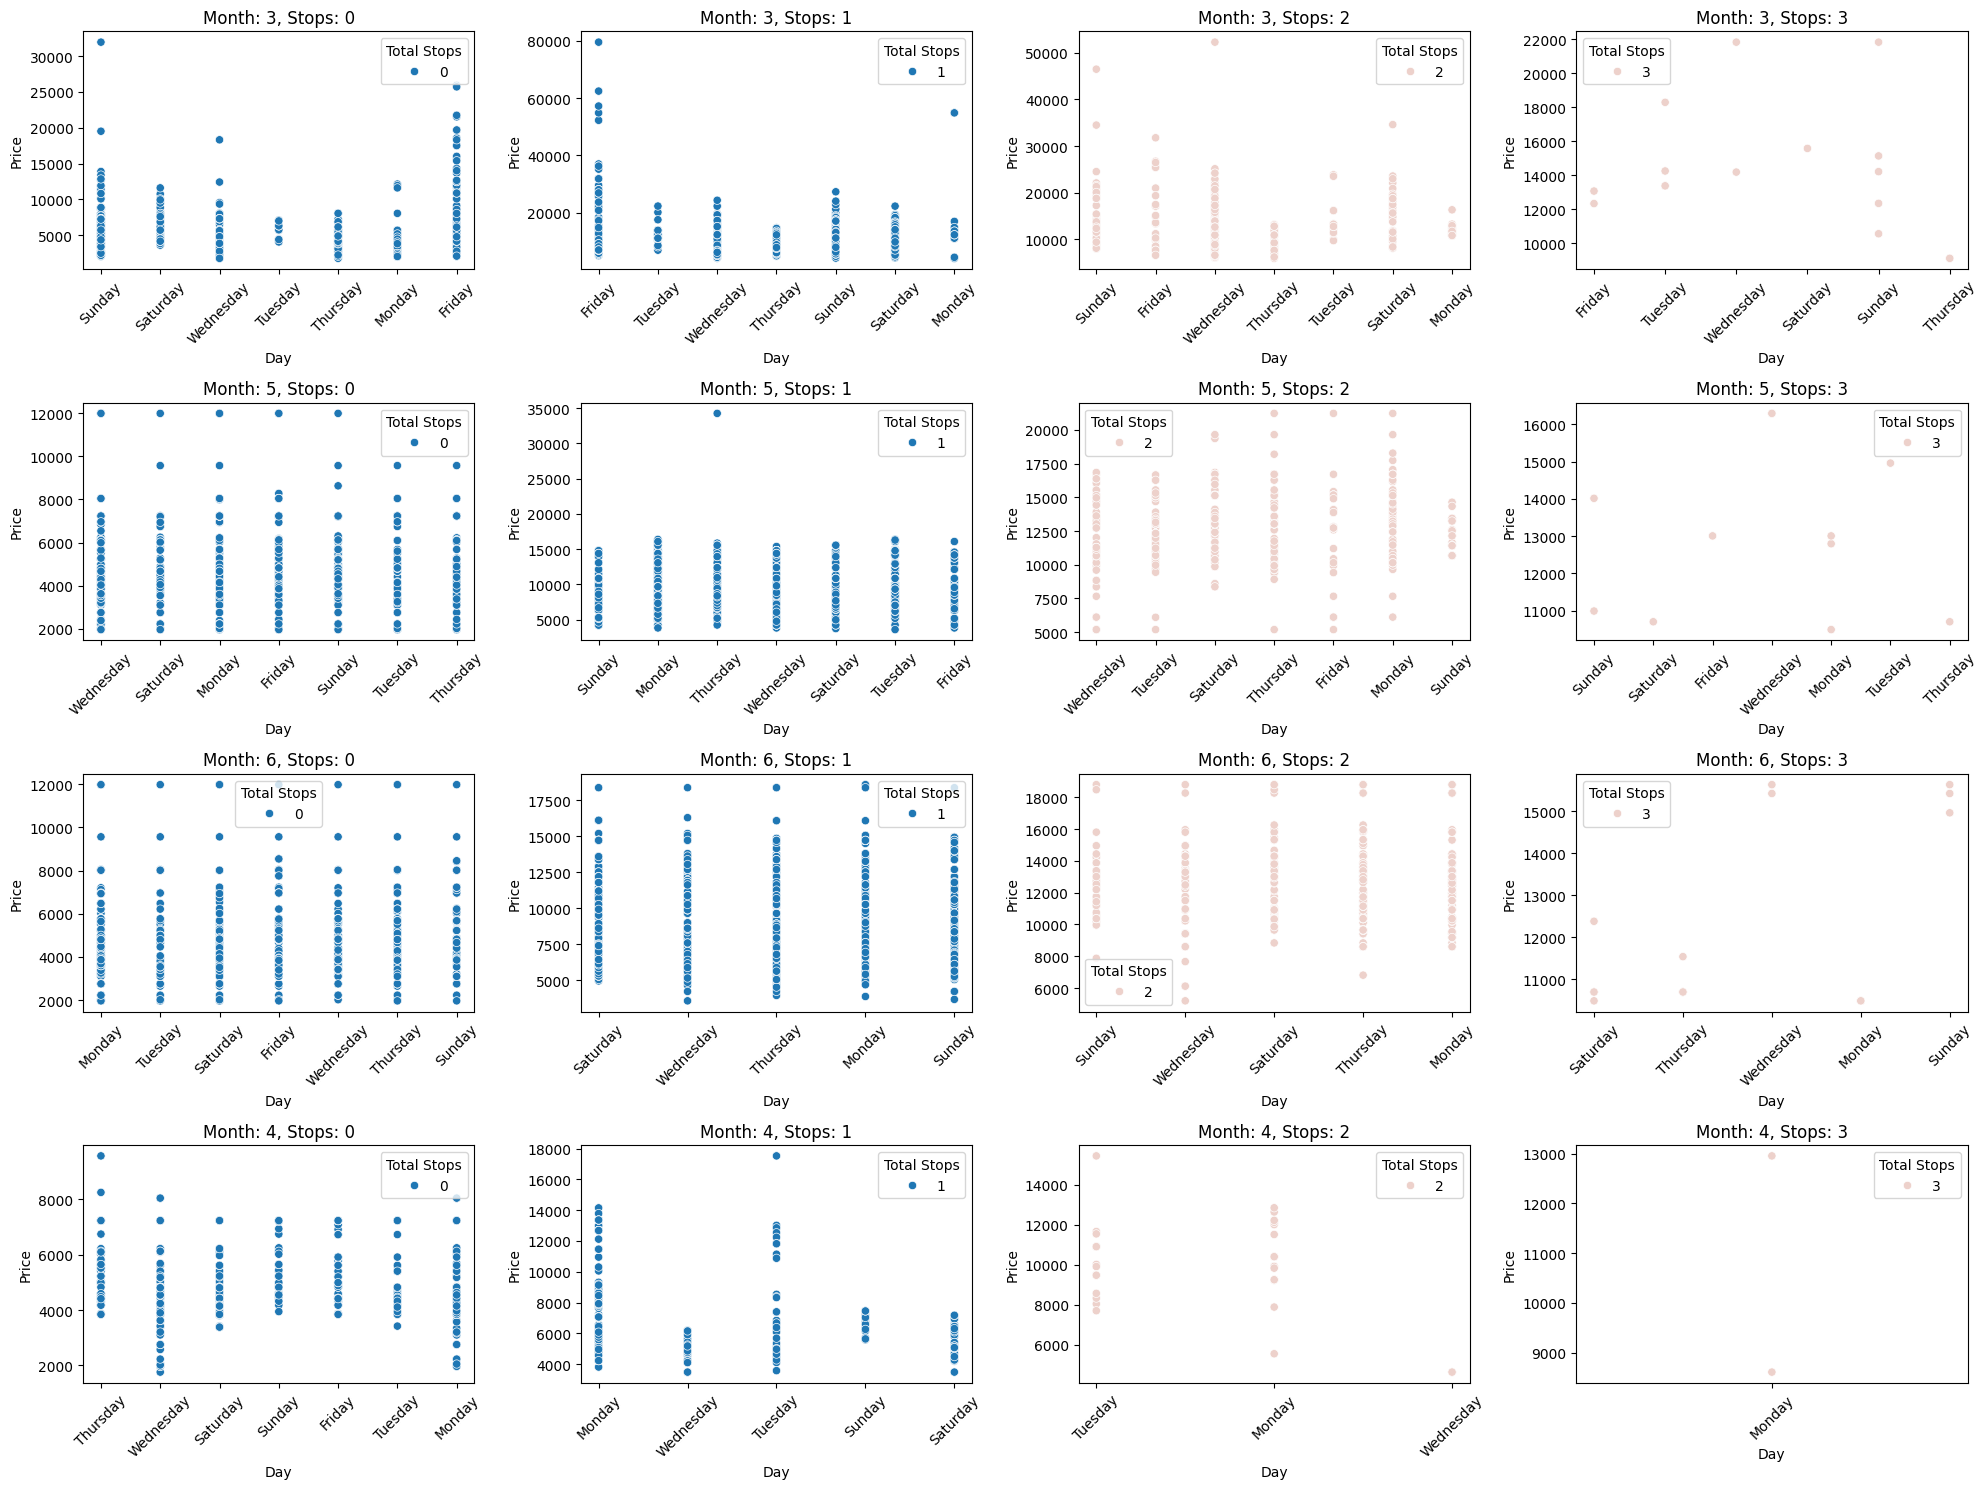

In [ ]:
MONTHS = [3, 5, 6, 4]
TOTAL_STOPS = [0, 1, 2, 3]

# Create a 5x4 subplot grid
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()

# Counter for subplot indexing
plot_idx = 0

# Iterate over the months and total stops to create scatter plots
for month in MONTHS:
    for stop in TOTAL_STOPS:
        Filtered_df = df[(df['Month'] == month) & (df["Total_Stops"] == stop)]

        # Create scatter plot for the current month and total stops
        sns.scatterplot(x="Day", y="Price", data=Filtered_df, hue="Total_Stops", ax=axs[plot_idx])
        axs[plot_idx].set_title(f'Month: {month}, Stops: {stop}')
        axs[plot_idx].set_xlabel('Day')
        axs[plot_idx].set_ylabel('Price')
        axs[plot_idx].legend(title='Total Stops')
        axs[plot_idx].tick_params(axis='x', rotation=45)

        # Move to the next subplot
        plot_idx += 1

# Ensure all subplots have the same labels and layout
plt.tight_layout()
plt.show()

##Machine learning

In [ ]:
def evaluate_model_all(X ,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

  categorical_features = Columns_objects
  models = [
      ("Linear Regression", LinearRegression()),
      ("Ridge Regression", Ridge()),
      ("Lasso Regression", Lasso()),
      ("ElasticNet", ElasticNet()),
      ("Decision Tree Regressor", DecisionTreeRegressor()),
      ("Random Forest Regressor", RandomForestRegressor()),
      ("Support Vector Machine Regressor", SVR()),
      ("K-Nearest Neighbors Regressor", KNeighborsRegressor()),
      ("Gradiant Boosting Regressor", GradientBoostingRegressor()),
      ("XGBoost Regressor", XGBRegressor()),
      ("LightGBM Regressor", LGBMRegressor()),

  ]

  pipelines = {}
  for name, model in models :
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(drop = "first"), categorical_features)
        ],
        remainder= "passthrough"
    )

    pipeline = Pipeline(steps = [
        ("preprocessor" , preprocessor),
        ("scaler" , StandardScaler()),
        (name , model),
    ])

    pipelines[name] = pipeline

  results = {}
  trained_models = {}
  for name, pipeline in pipelines.items():
    pipeline.fit(X_train , y_train)
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    r2 = r2_score(y_test , y_pred)
    results[name] = {"RMSE" : rmse , "R2" : r2}
    trained_models[name] = pipeline.named_steps[name]

  results_df = pd.DataFrame.from_dict(results, orient = "index").reset_index()
  results_df.rename(columns = {"index" : "Model"}, inplace = True)

  return results_df

In [ ]:
X = df.drop(['Price','Day','Full_date'] , axis=1)
y = df['Price']

evaluate_model_all(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 25
[LightGBM] [Info] Start training from score 9074.827873


,Model,RMSE,R2
0,Linear Regression,2854.729272,0.614936
1,Ridge Regression,2854.694163,0.614946
2,Lasso Regression,2854.729643,0.614936
3,ElasticNet,3004.505615,0.573471
4,Decision Tree Regressor,2675.827083,0.661687
5,Random Forest Regressor,2129.278546,0.785776
6,Support Vector Machine Regressor,4475.604197,0.053531
7,K-Nearest Neighbors Regressor,2216.939933,0.767774
8,Gradiant Boosting Regressor,2198.302366,0.771662
9,XGBoost Regressor,1735.964124,0.857608


## Deep Learning

###1 MLP(Multi - Layer - Preceptron)

In [ ]:
label_encoders = {}
for col in Columns_objects:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

model_MLP = Sequential([
    Input(shape = (X_train.shape[1], )),
    Dense(64, activation = "relu"),
    Dense(64, activation = "relu"),
    Dropout(0.5),
    Dense(32 , activation = "relu"),
    Dropout(0.5),
    Dense(1)
])

model_MLP.compile(optimizer = "adam", loss = "mean_squared_error")
model_MLP.fit(X_train, y_train, epochs=50, batch_size = 32, validation_data= (X_test, y_test))

Epoch 1/50
268/268 [==============================] - 2s 3ms/step - loss: 85910424.0000 - val_loss: 25434428.0000
Epoch 2/50
268/268 [==============================] - 1s 2ms/step - loss: 14903482.0000 - val_loss: 4362445.5000
Epoch 3/50
268/268 [==============================] - 1s 2ms/step - loss: 11854478.0000 - val_loss: 2758086.7500
Epoch 4/50
268/268 [==============================] - 1s 3ms/step - loss: 10250987.0000 - val_loss: 2015630.6250
Epoch 5/50
268/268 [==============================] - 1s 3ms/step - loss: 9607357.0000 - val_loss: 1605226.3750
Epoch 6/50
268/268 [==============================] - 1s 2ms/step - loss: 9467431.0000 - val_loss: 1489035.0000
Epoch 7/50
268/268 [==============================] - 1s 2ms/step - loss: 9370187.0000 - val_loss: 1470812.8750
Epoch 8/50
268/268 [==============================] - 1s 2ms/step - loss: 9049203.0000 - val_loss: 1122196.6250
Epoch 9/50
268/268 [==============================] - 1s 2ms/step - loss: 9123015.0000 - val_loss: 

In [ ]:
mlp_y_pred = model_MLP.predict(X_test)
mlp_rmse = mean_squared_error(y_test, mlp_y_pred, squared=False)
mlp_r2 = r2_score(y_test, mlp_y_pred)

print(f'RMSE: {mlp_rmse:.4f}')
print(f'R²: {mlp_r2:.4f}')

67/67 [==============================] - 0s 1ms/step
RMSE: 940.0349
R²: 0.9582


###2. RNN(Recurrent NEural Network)

In [ ]:
X_train_rnn = X_train.reshape((X_train.shape[0] , 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_RNN = Sequential([
    Input(shape = (X_train_rnn.shape[1], X_train_rnn.shape[2])),
    SimpleRNN(64, activation = "relu"),
    Dropout(0.5),
    Dense(32, activation = "relu"),
    Dropout(0.5),
    Dense(1)
])

model_RNN.compile(optimizer = "adam", loss="mean_squared_error")
model_RNN.fit(X_train_rnn , y_train, epochs=50, batch_size = 32, validation_data = (X_test_rnn, y_test))

Epoch 1/50
268/268 [==============================] - 3s 5ms/step - loss: 102400264.0000 - val_loss: 99449848.0000
Epoch 2/50
268/268 [==============================] - 1s 4ms/step - loss: 84808240.0000 - val_loss: 66107180.0000
Epoch 3/50
268/268 [==============================] - 1s 3ms/step - loss: 45658484.0000 - val_loss: 27411404.0000
Epoch 4/50
268/268 [==============================] - 1s 3ms/step - loss: 21527078.0000 - val_loss: 12430187.0000
Epoch 5/50
268/268 [==============================] - 1s 3ms/step - loss: 14554689.0000 - val_loss: 6796830.0000
Epoch 6/50
268/268 [==============================] - 1s 3ms/step - loss: 11772482.0000 - val_loss: 4449580.5000
Epoch 7/50
268/268 [==============================] - 1s 3ms/step - loss: 10146186.0000 - val_loss: 3459116.5000
Epoch 8/50
268/268 [==============================] - 1s 3ms/step - loss: 9707107.0000 - val_loss: 2608745.7500
Epoch 9/50
268/268 [==============================] - 1s 3ms/step - loss: 8721255.0000 - val

In [ ]:
rnn_y_pred = model_RNN.predict(X_test_rnn)
rnn_rmse = mean_squared_error(y_test, rnn_y_pred, squared= False)
rnn_r2 = r2_score(y_test , rnn_y_pred)

print(f"RMSE : {rnn_rmse : .4f}")
print(f"R2 : {rnn_r2 : .4f}")

67/67 [==============================] - 0s 1ms/step
RMSE :  628.3557
R2 :  0.9813


###3. LSTM(Long Short-Term Memory)

In [ ]:
X_train_lstm = X_train.reshape((X_train.shape[0] , 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_LSTM = Sequential([
    Input(shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(64, activation = "relu"),
    Dropout(0.5),
    Dense(32, activation = "relu"),
    Dropout(0.5),
    Dense(1)
])

model_LSTM.compile(optimizer = "adam", loss="mean_squared_error")
model_LSTM.fit(X_train_lstm , y_train, epochs=50, batch_size = 32, validation_data = (X_test_lstm, y_test))

Epoch 1/50
268/268 [==============================] - 3s 4ms/step - loss: 102836544.0000 - val_loss: 100689336.0000
Epoch 2/50
268/268 [==============================] - 1s 3ms/step - loss: 86573992.0000 - val_loss: 67886256.0000
Epoch 3/50
268/268 [==============================] - 1s 3ms/step - loss: 46732380.0000 - val_loss: 27840782.0000
Epoch 4/50
268/268 [==============================] - 1s 3ms/step - loss: 23140268.0000 - val_loss: 13411633.0000
Epoch 5/50
268/268 [==============================] - 1s 3ms/step - loss: 16245804.0000 - val_loss: 8422980.0000
Epoch 6/50
268/268 [==============================] - 1s 3ms/step - loss: 13959106.0000 - val_loss: 5927860.5000
Epoch 7/50
268/268 [==============================] - 1s 3ms/step - loss: 12172915.0000 - val_loss: 4356275.5000
Epoch 8/50
268/268 [==============================] - 1s 3ms/step - loss: 10845749.0000 - val_loss: 3428356.5000
Epoch 9/50
268/268 [==============================] - 1s 3ms/step - loss: 9778217.0000 - v

In [ ]:
lstm_y_pred = model_LSTM.predict(X_test_lstm)
lstm_rmse = mean_squared_error(y_test, lstm_y_pred, squared=False)
lstm_r2 = r2_score(y_test, lstm_y_pred)

print(f'RMSE: {lstm_rmse:.4f}')
print(f'R²: {lstm_r2:.4f}')

67/67 [==============================] - 0s 3ms/step
RMSE: 597.9626
R²: 0.9831


In [ ]:
print('\nMachine Learning\n')
evaluate_model_all(X,y)


Machine Learning

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 25
[LightGBM] [Info] Start training from score 9074.827873


,Model,RMSE,R2
0,Linear Regression,2854.729272,0.614936
1,Ridge Regression,2854.694163,0.614946
2,Lasso Regression,2854.729643,0.614936
3,ElasticNet,3004.505615,0.573471
4,Decision Tree Regressor,2722.836014,0.649695
5,Random Forest Regressor,2131.162281,0.785397
6,Support Vector Machine Regressor,4475.604197,0.053531
7,K-Nearest Neighbors Regressor,2216.939933,0.767774
8,Gradiant Boosting Regressor,2198.343928,0.771654
9,XGBoost Regressor,1735.964124,0.857608


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Multi-Layer Perceptron', 'Recurrent Neural Network', 'Long Short-Term Memory'],
    'RMSE': [mlp_rmse, rnn_rmse, lstm_rmse],
    'R²': [mlp_r2, rnn_r2, lstm_r2]
})
print('\nDeep Learning\n')
results_df


Deep Learning



,Model,RMSE,R²
0,Multi-Layer Perceptron,940.034931,0.958247
1,Recurrent Neural Network,628.355683,0.981344
2,Long Short-Term Memory,597.962640,0.983105
